In [2]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib
%pip list

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        Fil

In [61]:
# Import Dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt

In [64]:
# Verifying correct data separation
print(os.listdir('chest_xray/train'))
os.listdir('chest_xray/test')

['NORMAL', 'PNEUMONIA']


['NORMAL', 'PNEUMONIA']

In [66]:
# Checking image size
img = cv2.imread(os.path.join('chest_xray', 'train', 'NORMAL', 'NORMAL-28501-0001.jpeg'))
img.shape

(2418, 2434, 3)

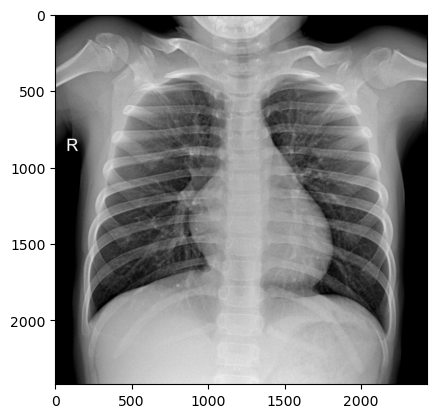

In [22]:
# Example image
plt.imshow(img)

In [56]:
test_data = tf.keras.utils.image_dataset_from_directory('chest_xray/test', batch_size=32)
train_data = tf.keras.utils.image_dataset_from_directory('chest_xray/train', batch_size=32)

Found 624 files belonging to 2 classes.
Found 5232 files belonging to 2 classes.


In [57]:
data_iterator = train_data.as_numpy_iterator()

In [58]:
# Getting a batch of data
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

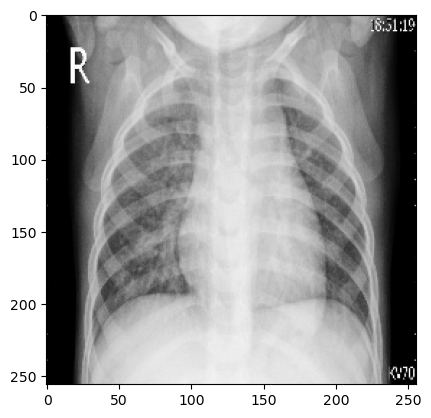

In [59]:
plt.imshow(batch[0][0].astype('int'))

In [67]:
# 1 = Pneumonia, 0 = Normal? (Will Double Check Later)
batch[1]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

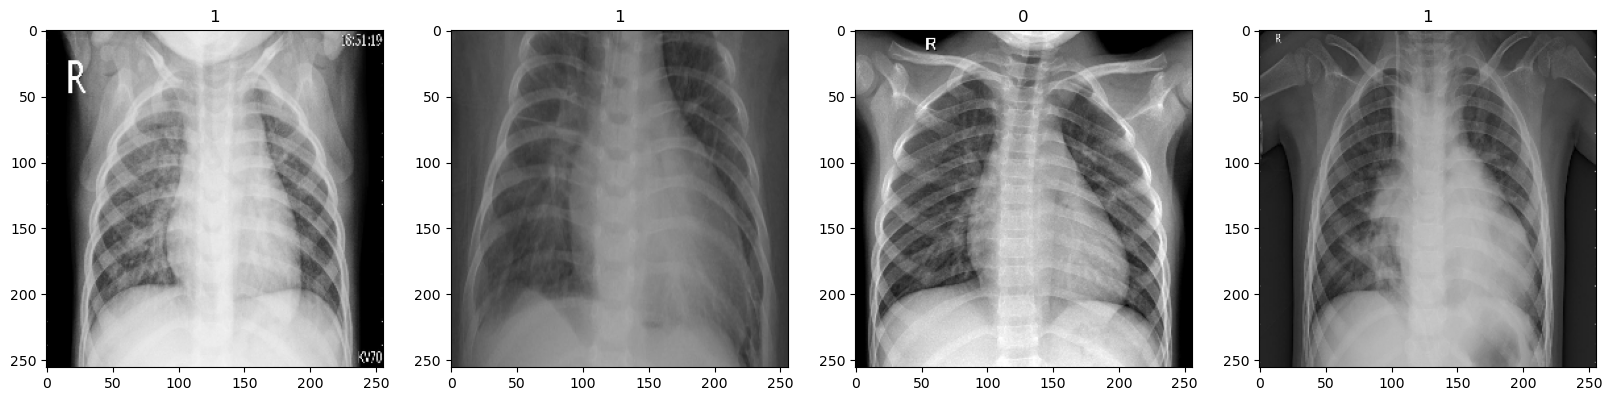

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].set_title(batch[1][idx])

In [75]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [73]:
scaled = batch[0] / 255

In [74]:
scaled.min(), scaled.max()

(0.0, 1.0)

# PreProcessing

In [76]:
preprocess_data = train_data.map(lambda x, y: (x/255, y))

In [78]:
preprocess_data.as_numpy_iterator().next()[0].max()

1.0

In [79]:
len(preprocess_data)

164